In [35]:
import pandas as  pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math
import seaborn as sns

In [16]:
crash=pd.read_csv('CDS_all.csv', encoding = "utf-8")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
numNoneTypebyRow=crash.isnull().sum(axis=1).tolist()
numNoneTypebyColumn=crash.isnull().sum(axis=0).tolist()
x=len(numNoneTypebyRow)
y=len(numNoneTypebyColumn)
fullRow=0
fullCol=0
for element in numNoneTypebyRow:
    if element==0:
        fullRow=fullRow+1
for element in numNoneTypebyColumn:
    if element==0:
        fullCol=fullCol+1
print('Total Number of Rows', x)
print('Number of Full Rows',fullRow)
print('Total Number of Columns', y)
print('Number of Full Columns',fullCol)

Total Number of Rows 83926
Number of Full Rows 0
Total Number of Columns 58
Number of Full Columns 3


No row has complete data. Columns that were considered important and essential were Park Name, Date, Time and Type. Any observations without these 4 components were removed. Originally, there were 83926 crashes, this cleaning process yielded 83147 observations.

In [18]:
percentIncomplete=[]
for element in numNoneTypebyRow:
    percentIncomplete.append(element/58)

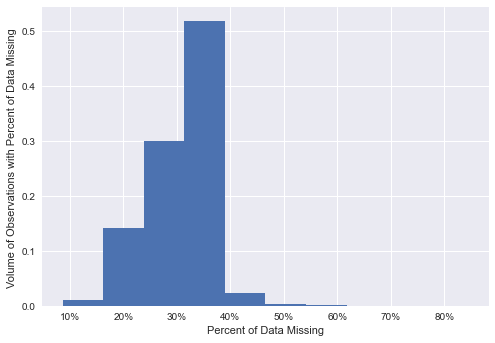

In [19]:
plt.hist(percentIncomplete, weights=np.ones(len(percentIncomplete)) / len(percentIncomplete))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Percent of Data Missing')
plt.ylabel('Volume of Observations with Percent of Data Missing ')
plt.show()

In [22]:
crash

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,"Tuesday, June 10, 2014",1635.0,NaN,...,38.91205,-76.93412,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,"Tuesday, October 9, 2012",1100.0,101,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,"Tuesday, November 17, 2009",1709.0,NaN,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,"Saturday, August 4, 2007",1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,"Wednesday, April 25, 2007",750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83921,83123,N/A050208172701,9999003672,ZZZZ,NaN,1,NaN,"Tuesday, February 8, 2005",1727.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83922,83117,N/A050118055001,9999001622,ZZZZ,NaN,1,VA,"Tuesday, January 18, 2005",550.0,5036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83923,83113,N/A050108164801,9999000671,ZZZZ,NaN,1,NaN,"Saturday, January 8, 2005",1648.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83924,83110,N/A050104183001,9999000291,ZZZZ,NaN,1,NaN,"Tuesday, January 4, 2005",1830.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
allCrash = crash.loc[crash.PARK_ALPHA != 'ZZZZ']
allCrash = allCrash[allCrash['CRASH_DATE'].notna()]
allCrash = allCrash[allCrash['CRASH_TIME'].notna()]
allCrash

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,"Tuesday, June 10, 2014",1635.0,NaN,...,38.912050,-76.934120,0.000,NaN,NaN,00:00.0,NaN,NaN,NaN,0
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,"Tuesday, October 9, 2012",1100.0,101,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,"Tuesday, November 17, 2009",1709.0,NaN,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,"Saturday, August 4, 2007",1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,"Wednesday, April 25, 2007",750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83142,82917,ZION991208183000,1590993107,ZION,IMR,1,UT,"Wednesday, December 8, 1999",1830.0,12,...,37.359348,-113.073673,4.763,NaN,NaN,NaN,ZION-0014,C3,4.863,1
83143,82900,ZION990817161000,1590992042,ZION,IMR,1,UT,"Tuesday, August 17, 1999",1610.0,12,...,37.350901,-113.083224,2.299,NaN,NaN,NaN,ZION-0014,C3,2.299,1
83144,82886,ZION990804103000,1590991815,ZION,IMR,1,UT,"Wednesday, August 4, 1999",1030.0,11,...,37.273078,-112.946127,5.034,NaN,NaN,NaN,ZION-0011,C3,5.029,1
83145,82869,ZION990611200700,1590991046,ZION,IMR,1,UT,"Friday, June 11, 1999",2007.0,10,...,37.210393,-112.957975,5.048,NaN,NaN,NaN,ZION-0010,C3,4.972,1


In [23]:
allCrash['CRASH_DATE']=pd.to_datetime(allCrash['CRASH_DATE'])
allCrash['day_of_week'] = allCrash['CRASH_DATE'].dt.day_name()

In [24]:
df_day_grouped=allCrash.groupby(['day_of_week']).count()
df_day_grouped=df_day_grouped.reset_index()
df_day_grouped=df_day_grouped[['day_of_week','# Crash']].sort_values(by='day_of_week')
df_day_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_day_grouped=df_day_grouped.reindex([1,5,6,4,0,2,3])
df_day_grouped

,day_of_week,number_of_crashes
1,Monday,10928
5,Tuesday,11419
6,Wednesday,11789
4,Thursday,12088
0,Friday,13293
2,Saturday,12642
3,Sunday,10988


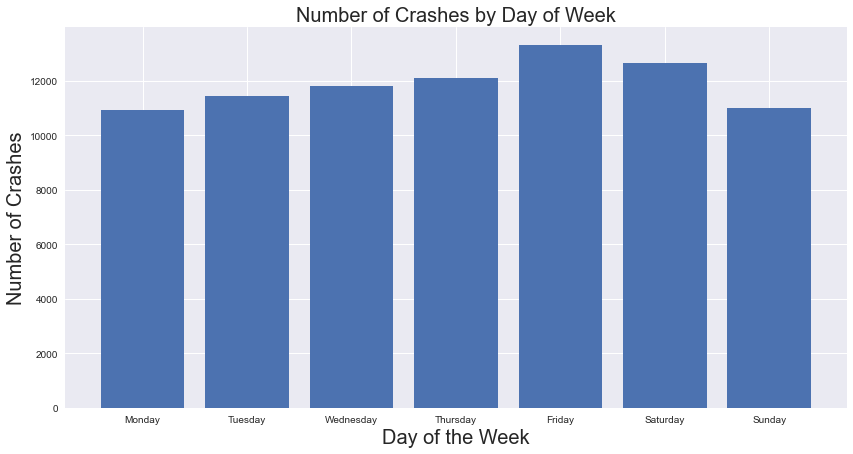

In [25]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_grouped.day_of_week, df_day_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [26]:
df_type_grouped=allCrash.groupby(['CATEGORY']).count()
df_type_grouped=df_type_grouped.reset_index()
df_type_grouped=df_type_grouped[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_grouped

,CATEGORY,number_of_crashes
0,FATAL,322
1,INJURY,12161
2,PD ONLY,70091


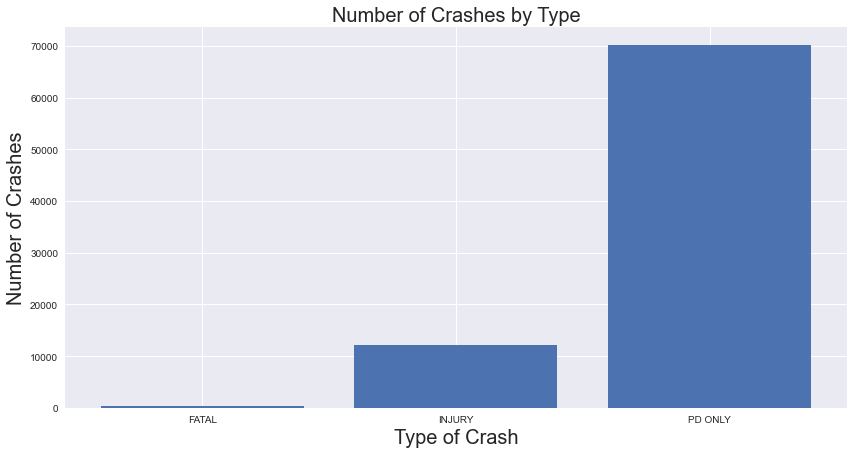

In [27]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_type_grouped.CATEGORY, df_type_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Type', fontsize=20)

ax.set_xlabel('Type of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [31]:
allCrash['hour'] = (allCrash['CRASH_TIME']/100).astype(int) *100
allCrash.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,2014-06-10,1635.0,NaN,...,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,1600
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,2012-10-09,1100.0,101,...,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,1100
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,2009-11-17,1709.0,NaN,...,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,1700
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,2007-08-04,1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Saturday,1700
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,2007-04-25,750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Wednesday,700


In [32]:
df_time_grouped=allCrash.groupby(['hour']).count()
df_time_grouped=df_time_grouped.reset_index()
df_time_grouped=df_time_grouped[['hour','# Crash']].sort_values(by='hour')
df_time_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_time_grouped

,hour,number_of_crashes
0,0,1541
1,100,1244
2,200,1255
3,300,1191
4,400,883
5,500,1308
6,600,2429
7,700,3700
8,800,4410
9,900,4122


[Text(0.5, 1.0, 'Number of Crashes by Hour')]

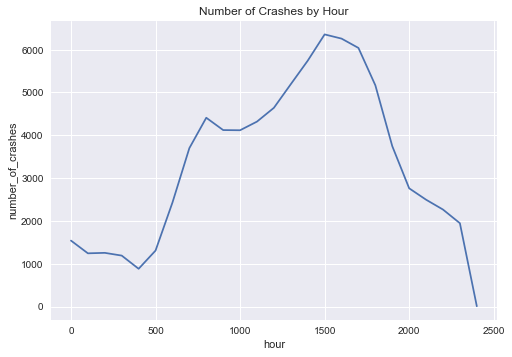

In [38]:
sns.lineplot(data=df_time_grouped, x="hour", y="number_of_crashes").set(title='Number of Crashes by Hour')

In [58]:
df_region_grouped=allCrash.groupby(['Region']).count()
df_region_grouped=df_region_grouped.reset_index()
df_region_grouped=df_region_grouped[['Region','# Crash']].sort_values(by='Region')
df_region_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_region_grouped

,Region,number_of_crashes
0,AKR,9
1,IMR,9654
2,MWR,630
3,NCR,49374
4,NER,8399
5,PWR,7269
6,SER,7812


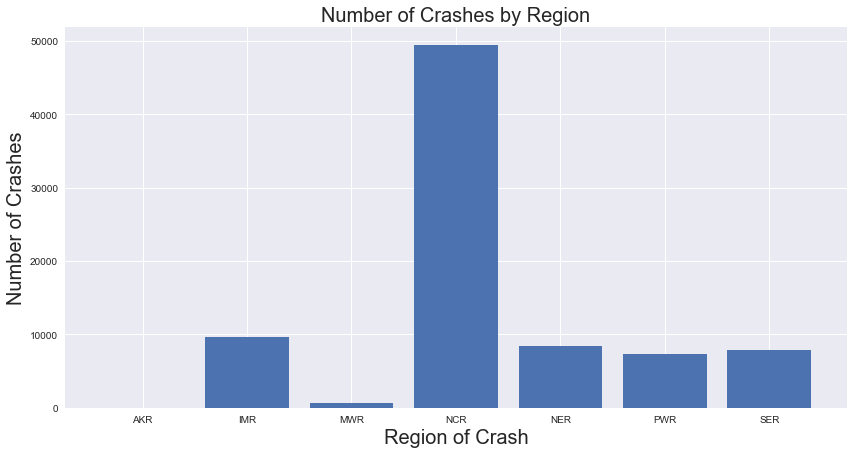

In [60]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_region_grouped.Region, df_region_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Region', fontsize=20)

ax.set_xlabel('Region of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [37]:
IMRcrashes = allCrash.loc[allCrash.Region == 'IMR']
IMRcrashes

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour
654,503,AMIS980705123000,7100980482,AMIS,IMR,1,TX,1998-07-05,1230.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Sunday,1200
655,495,AMIS980308181500,7100980108,AMIS,IMR,1,TX,1998-03-08,1815.0,750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Sunday,1800
656,494,AMIS980217163000,7100980069,AMIS,IMR,1,TX,1998-02-17,1630.0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Tuesday,1600
657,473,AMIS960729090000,7100960499,AMIS,IMR,1,TX,1996-07-29,900.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Monday,900
658,472,AMIS960728100000,7100960211,AMIS,IMR,1,TX,1996-07-28,1000.0,203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Sunday,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83142,82917,ZION991208183000,1590993107,ZION,IMR,1,UT,1999-12-08,1830.0,12,...,4.763,NaN,NaN,NaN,ZION-0014,C3,4.863,1,Wednesday,1800
83143,82900,ZION990817161000,1590992042,ZION,IMR,1,UT,1999-08-17,1610.0,12,...,2.299,NaN,NaN,NaN,ZION-0014,C3,2.299,1,Tuesday,1600
83144,82886,ZION990804103000,1590991815,ZION,IMR,1,UT,1999-08-04,1030.0,11,...,5.034,NaN,NaN,NaN,ZION-0011,C3,5.029,1,Wednesday,1000
83145,82869,ZION990611200700,1590991046,ZION,IMR,1,UT,1999-06-11,2007.0,10,...,5.048,NaN,NaN,NaN,ZION-0010,C3,4.972,1,Friday,2000


In [39]:
df_day_groupedIMR=IMRcrashes.groupby(['day_of_week']).count()
df_day_groupedIMR=df_day_groupedIMR.reset_index()
df_day_groupedIMR=df_day_groupedIMR[['day_of_week','# Crash']].sort_values(by='day_of_week')
df_day_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_day_groupedIMR=df_day_groupedIMR.reindex([1,5,6,4,0,2,3])
df_day_groupedIMR

,day_of_week,number_of_crashes
1,Monday,1288
5,Tuesday,1350
6,Wednesday,1273
4,Thursday,1313
0,Friday,1414
2,Saturday,1543
3,Sunday,1473


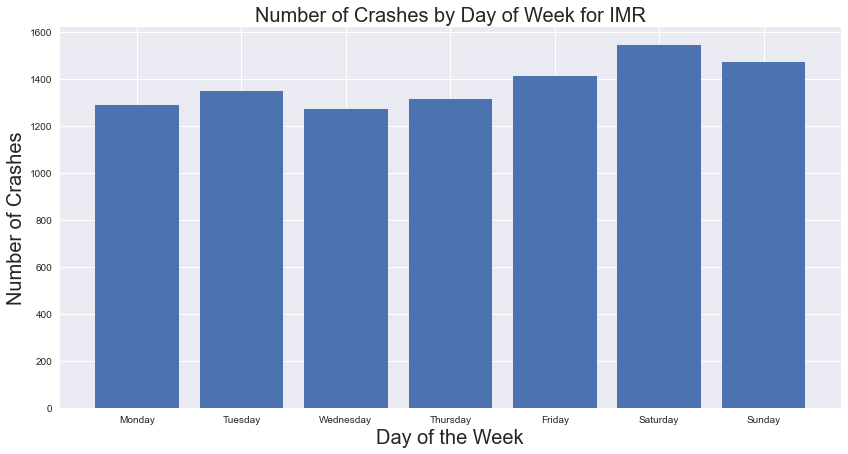

In [40]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_groupedIMR.day_of_week, df_day_groupedIMR.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week for IMR', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [41]:
df_type_groupedIMR=IMRcrashes.groupby(['CATEGORY']).count()
df_type_groupedIMR=df_type_groupedIMR.reset_index()
df_type_groupedIMR=df_type_groupedIMR[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_groupedIMR

,CATEGORY,number_of_crashes
0,FATAL,37
1,INJURY,1099
2,PD ONLY,8414


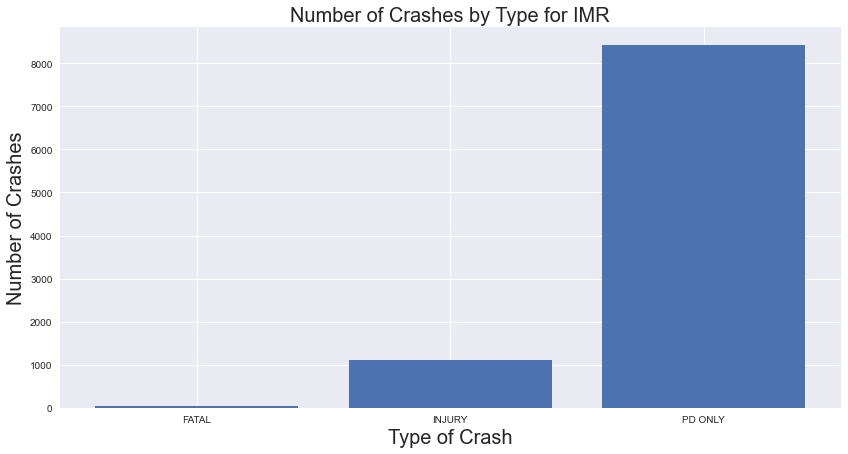

In [42]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_type_groupedIMR.CATEGORY, df_type_groupedIMR.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Type for IMR', fontsize=20)

ax.set_xlabel('Type of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

[Text(0.5, 1.0, 'Number of Crashes by Hour in IMR')]

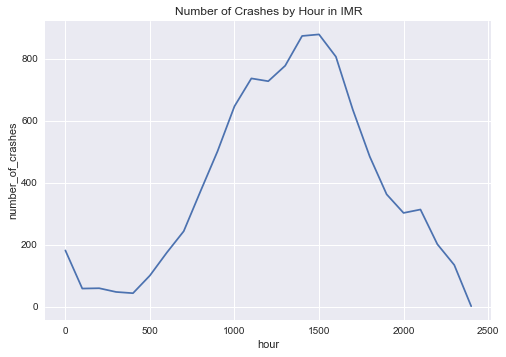

In [44]:
df_time_groupedIMR=IMRcrashes.groupby(['hour']).count()
df_time_groupedIMR=df_time_groupedIMR.reset_index()
df_time_groupedIMR=df_time_groupedIMR[['hour','# Crash']].sort_values(by='hour')
df_time_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
sns.lineplot(data=df_time_groupedIMR, x="hour", y="number_of_crashes").set(title='Number of Crashes by Hour in IMR')

In [45]:
df_park_groupedIMR=IMRcrashes.groupby(['PARK_ALPHA']).count()
df_park_groupedIMR=df_park_groupedIMR.reset_index()
df_park_groupedIMR=df_park_groupedIMR[['PARK_ALPHA','# Crash']].sort_values(by='PARK_ALPHA')
df_park_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_park_groupedIMR.rename(columns={'PARK_ALPHA': 'Park'}, inplace=True)
df_park_groupedIMR

,Park,number_of_crashes
0,AMIS,38
1,ARCH,12
2,BAND,1
3,BIBE,394
4,BITH,4
5,BRCA,15
6,CANY,1
7,CARE,1
8,CHIC,56
9,COLM,73


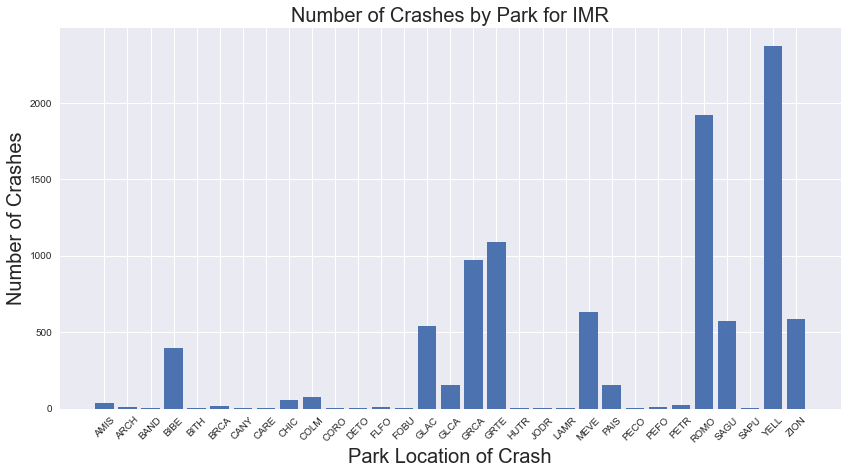

In [57]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_park_groupedIMR.Park,df_park_groupedIMR.number_of_crashes)
ax.set_title('Number of Crashes by Park for IMR', fontsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('Park Location of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()